# Abschlussprojekt Big Data Engineering

## Read Data

In [21]:
import sqlite3
import pandas as pd
import csv
import time
import datetime

# Create database or connect to one
connection = sqlite3.connect('database.sqlite')

# Create cursor instance
db = connection.cursor()

# Create query
db.execute("SELECT name FROM sqlite_master WHERE type='table';")
data = db.fetchall()
print(data)
# Commit changes
connection.commit()

# Close connection
connection.close()


[('sqlite_sequence',), ('Player_Attributes',), ('Player',), ('Match',), ('League',), ('Country',), ('Team',), ('Team_Attributes',)]


In [22]:
# Create database or connect to one
connection = sqlite3.connect('database.sqlite')

# Create cursor instance
db = connection.cursor()

# Create query
db.execute("SELECT * FROM sqlite_sequence")
data = db.fetchall()
print(data)
# Commit changes
connection.commit()

# Close connection
connection.close()


[('Team', 103916), ('Country', 51958), ('League', 51958), ('Match', 51958), ('Player', 11075), ('Player_Attributes', 183978), ('Team_Attributes', 1458)]


In [23]:
# Create the connection
db = sqlite3.connect('./database.sqlite')
db

# create the dataframe from a query
df_player = pd.read_sql_query("SELECT * FROM Player", db)
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [24]:
#df_player.to_csv("Player.csv", index=False)

In [25]:
# Create the connection
db = sqlite3.connect('./database.sqlite')
db

# create the dataframe from a query
df_player_attributes = pd.read_sql_query("SELECT * FROM Player_Attributes", db)
df_player_attributes.head()


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [26]:
#df_player_attributes.to_csv("Player_Attributes.csv", index=False)

In [27]:
# create the dataframe from a query
df_team = pd.read_sql_query("SELECT * FROM Team", db)
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [28]:
#df_team.to_csv("Teams.csv", index=False)

In [29]:
# create the dataframe from a query
df_team_attributes = pd.read_sql_query("SELECT * FROM Team_Attributes", db)
df_team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [30]:
#df_team_attributes.to_csv("Team_Attributes.csv", index=False)

In [31]:
# create the dataframe from a query
df_match = pd.read_sql_query("SELECT * FROM Match", db)
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [32]:
#df_match.to_csv("Match.csv", index=False)

In [33]:
# create the dataframe from a query
df_country = pd.read_sql_query("SELECT * FROM Country", db)
df_country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [34]:
#df_country.to_csv("Country.csv", index=False)

In [35]:
# create the dataframe from a query
df_league = pd.read_sql_query("SELECT * FROM League", db)
df_league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [36]:
#df_league.to_csv("League.csv", index=False)

## Hash-Key Erzeugung

In [37]:
import hashlib 

#key_to_convert = ["Tool Design", "Research and Development", 1000]

def create_hash(key_to_convert):

    seperator = ", "
    key_to_convert = seperator.join(map(str, key_to_convert)) 

    if key_to_convert == None: # Change NULLS to empty strings
        return("") 
    else: 
        key_to_convert_str = str(key_to_convert) # Convert all to String data type
        key_to_convert_no_spaces = key_to_convert_str.replace(' ', '') # Trim all Fields, NON-Space delimiter between fields
        key_to_convert_capital_letters = key_to_convert_no_spaces.upper() # UPPERcase the string
        hash_object = hashlib.md5(key_to_convert_capital_letters.encode('utf-8'))
        print(key_to_convert_capital_letters)
        #print(hash_object.hexdigest())

    return hash_object.hexdigest()

# create_hash(key_to_convert)

## Create Data Vault

In [39]:
# Create database or connect to one
connection = sqlite3.connect('wett_prognose.db')

# Create cursor instance
db = connection.cursor()      

# Hub Team
db.execute("""CREATE TABLE HUB_Team (

    HK_Hub_Team varchar(100), H_BK_id_team INTEGER, LDTS varchar(20), recourd_source varchar(50) 
    
    )""")

# Satellite Team
db.execute("""CREATE TABLE Link_Sales (

    S_HK_team varchar(100), H_HK_team varchar(100), LDTS varchar(100), EDTS varchar(100), HD varchar(100), recourd_source varchar(50), team_api_id INTEGER, team_fifa_api_id INTEGER 
    
    )""")

# Satellite Team Name
db.execute("""CREATE TABLE Sat_Team_Name (
    
    S_HK_team_name varchar(100), H_HK_team varchar(100), LDTS varchar(100), EDTS varchar(100), HD varchar(100), recourd_source varchar(50), team_long_name varchar(100), team_short_name varchar(100) 

    )""")

# Satellite Country
db.execute("""CREATE TABLE Sat_Country (
    
    S_HK_country varchar(100), H_HK_team varchar(100), LDTS varchar(100), EDTS varchar(100), HD varchar(100), recourd_source varchar(50), country_name varchar(100) 
    
    )""")

# Satellite League
db.execute("""CREATE TABLE Sat_League (
    
    S_HK_team_league varchar(100), H_HK_team varchar(100), LDTS varchar(100), EDTS varchar(100), HD varchar(100), recourd_source varchar(50), league_name varchar(100)

    
    )""")

# Satellite Defensive
db.execute("""CREATE TABLE Sat_Defensive (
    
    S_HK_defensive varchar(100), H_HK_team varchar(100), LDTS varchar(100), EDTS varchar(100), HD varchar(100), recourd_source varchar(50), defencePressure INTEGER, defencePressureClass varchar(100), defenceAggression INTEGER, defenceAggressionClass varchar(100), defenceTeamWidth INTEGER, defenceTeamWidthClass varchar(100), defenceDefenderLineClass varchar(100)  
    
    )""")

# Satellite Aufbauspiel
db.execute("""CREATE TABLE Sat_Aufbauspiel (
    
    S_HK_aufbauspiel varchar(100), H_HK_team varchar(100), LDTS varchar(100), EDTS varchar(100), HD varchar(100), recourd_source varchar(50), buildUpPlaySpeed INTEGER, buildUpPlaySpeedClass varchar(100), buildUpPlayDribbling INTEGER, buildUpPlayDribblingClass varchar(100), buildUpPlayPassing INTEGER, buildUpPlayPassingClass varchar(100), buildUpPlayPositioningClass varchar(100)    
    
    )""")

# Satellite Chancenerarbeitung
db.execute("""CREATE TABLE Sat_Chancenerarbeitung (
    
    S_HK_Chancenerarbeitung varchar(100), H_HK_team varchar(100), LDTS varchar(100), EDTS varchar(100), HD varchar(100), recourd_source varchar(50), chanceCreationPassing INTEGER, chanceCreationPassingClass varchar(100), chanceCreationCrossing INTEGER, chanceCreationCrossingClass varchar(100), chanceCreationShooting INTEGER, chanceCreationShootingClass varchar(100), chanceCreationPositioningClass varchar(100)    
    )""")

# Link Match
db.execute("""CREATE TABLE Link_Match (

    L_HK_match varchar(100), H_HK_team_home varchar(100), H_HK_team_away varchar(100), LDTS varchar(100), EDTS varchar(100), recourd_source varchar(50), date varchar(50) 
    
    )""")

# Satellite Record Source
db.execute("""CREATE TABLE Sat_Recourd_Source (
    
    S_HK_RS varchar(100), L_HK_match varchar(100), LDTS varchar(100), EDTS varchar(100), HD varchar(100), recourd_source varchar(50), origin varchar(100), dataOwner varchar(100), sourceSystem varchar(100)    
    
    )""")

# Satellite Interwetten
db.execute("""CREATE TABLE Sat_Interwetten (
    
    S_HK_Interwetten varchar(100), L_HK_match varchar(100), LDTS varchar(100), EDTS varchar(100), HD varchar(100), recourd_source varchar(50), IWH varchar(100), IWD varchar(100), IWA varchar(100)    
    
    )""")

# Satellite Bet and Win
db.execute("""CREATE TABLE Sat_BandW (
    
    S_HK_BandW varchar(100), L_HK_match varchar(100), LDTS varchar(100), EDTS varchar(100), HD varchar(100), recourd_source varchar(50), BWH varchar(100), BWD varchar(100), BWA varchar(100)    
    )""")

# Satellite Bet365
db.execute("""CREATE TABLE Sat_Bet365 (
    
    S_HK_B365 varchar(100), L_HK_match varchar(100), LDTS varchar(100), EDTS varchar(100), HD varchar(100), recourd_source varchar(50), B365H varchar(100), B365D varchar(100), B365A varchar(100)    
    
    )""")

# Satellite Match
db.execute("""CREATE TABLE Sat_Match (
    
    S_HK_Match varchar(100), L_HK_team varchar(100), LDTS varchar(100), EDTS varchar(100), HD varchar(100), recourd_source varchar(50), season varchar(50), stage INTEGER, match_api_id INTEGER, home_team_api_id INTEGER, away_team_api_id INTEGER, home_team_goal INTEGER, away_team_goa, INTEGER    
    
    )""")

# Commit changes
connection.commit()

# Close connection
connection.close()

In [40]:
# Create database or connect to one
connection = sqlite3.connect('wett_prognose.db')

# Create cursor instance
c = connection.cursor()

HK_raw = []

for row in range(len(df_team)):
    ts = time.time()
    timestamp = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
    
    HK_raw.append(df_team.loc[row,"id"])
    recourd_source_input = "wettprognosedbHubTeam"
    HK_raw.append(recourd_source_input)
    HK = create_hash(HK_raw)
    ID_Hub_Team = df_team.loc[row,"id"]

    # insert = 
    c.execute("INSERT INTO Hub_Team Values (?,?,?,?)", (str(HK), str(ID_Hub_Team), str(recourd_source_input), str(timestamp)))
    #"INSERT INTO Hub_Store Values ('"+ str(HK) +"', '"+ str(Store_ID) +"', '"+ str(recourd_source_input)+"', '"+ str(timestamp) +"');"
    HK_raw = []
    
    
# Print column names and values. Uncomment to comprehend if writing into database was successfully
c.execute("SELECT * FROM Hub_Team")
col_name_list = [tuple[0] for tuple in c.description]
print(col_name_list)
db_values = c.fetchall()
print(db_values)

# Commit changes
connection.commit()

# Close connection
connection.close()

1,WETTPROGNOSEDBHUBTEAM
2,WETTPROGNOSEDBHUBTEAM
3,WETTPROGNOSEDBHUBTEAM
4,WETTPROGNOSEDBHUBTEAM
5,WETTPROGNOSEDBHUBTEAM
6,WETTPROGNOSEDBHUBTEAM
7,WETTPROGNOSEDBHUBTEAM
8,WETTPROGNOSEDBHUBTEAM
9,WETTPROGNOSEDBHUBTEAM
10,WETTPROGNOSEDBHUBTEAM
11,WETTPROGNOSEDBHUBTEAM
12,WETTPROGNOSEDBHUBTEAM
13,WETTPROGNOSEDBHUBTEAM
14,WETTPROGNOSEDBHUBTEAM
15,WETTPROGNOSEDBHUBTEAM
16,WETTPROGNOSEDBHUBTEAM
17,WETTPROGNOSEDBHUBTEAM
18,WETTPROGNOSEDBHUBTEAM
614,WETTPROGNOSEDBHUBTEAM
1034,WETTPROGNOSEDBHUBTEAM
1042,WETTPROGNOSEDBHUBTEAM
1513,WETTPROGNOSEDBHUBTEAM
2004,WETTPROGNOSEDBHUBTEAM
2476,WETTPROGNOSEDBHUBTEAM
2510,WETTPROGNOSEDBHUBTEAM
3457,WETTPROGNOSEDBHUBTEAM
3458,WETTPROGNOSEDBHUBTEAM
3459,WETTPROGNOSEDBHUBTEAM
3460,WETTPROGNOSEDBHUBTEAM
3461,WETTPROGNOSEDBHUBTEAM
3462,WETTPROGNOSEDBHUBTEAM
3463,WETTPROGNOSEDBHUBTEAM
3464,WETTPROGNOSEDBHUBTEAM
3465,WETTPROGNOSEDBHUBTEAM
3466,WETTPROGNOSEDBHUBTEAM
3467,WETTPROGNOSEDBHUBTEAM
3468,WETTPROGNOSEDBHUBTEAM
3469,WETTPROGNOSEDBHUBTEAM
3470,WETTPROGNOSEDBH

## Match Prognose: Home Advantage Approach

In [41]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge

df_prognose = pd.concat([df_match["country_id"], df_match["league_id"], df_match["season"], df_match["date"], df_match["home_team_api_id"], df_match["away_team_api_id"], df_match["home_team_goal"], df_match["away_team_goal"]], axis=1)

# Home Team
for row in range(len(df_match)):
    for test in range(len(df_team)):
        if df_prognose.loc[row, "home_team_api_id"] == df_team.loc[test,"team_api_id"]:
            df_prognose.loc[row, "home_team_api_id"] = df_team.loc[test,"team_long_name"]

In [42]:
# Away Team
for row in range(len(df_match)):
    for test in range(len(df_team)):
        if df_prognose.loc[row, "away_team_api_id"] == df_team.loc[test,"team_api_id"]:
            df_prognose.loc[row, "away_team_api_id"] = df_team.loc[test,"team_long_name"]

In [43]:
# Country
for row in range(len(df_match)):
    for test in range(len(df_country)):
        if df_prognose.loc[row, "country_id"] == df_country.loc[test,"id"]:
            df_prognose.loc[row, "country_id"] = df_country.loc[test,"name"]

In [44]:
# League
for row in range(len(df_match)):
    for test in range(len(df_league)):
        if df_prognose.loc[row, "league_id"] == df_league.loc[test,"id"]:
            df_prognose.loc[row, "league_id"] = df_league.loc[test,"name"]

In [45]:
df_prognose['goal_difference'] = df_prognose['home_team_goal'] - df_prognose['away_team_goal']

# create new variables to show home team win or loss result
df_prognose['home_win'] = np.where(df_prognose['goal_difference'] > 0, 1, 0)
df_prognose['home_loss'] = np.where(df_prognose['goal_difference'] < 0, 1, 0)

df_prognose_bundesliga = df_prognose.loc[(df_prognose["league_id"] == "Germany 1. Bundesliga") & (df_prognose["season"] == "2015/2016")]
df_prognose_bundesliga 




,country_id,league_id,season,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,goal_difference,home_win,home_loss
9950,Germany,Germany 1. Bundesliga,2015/2016,2015-08-14 00:00:00,FC Bayern Munich,Hamburger SV,5,0,5,1,0
9951,Germany,Germany 1. Bundesliga,2015/2016,2015-08-15 00:00:00,Borussia Dortmund,Borussia Mönchengladbach,4,0,4,1,0
9952,Germany,Germany 1. Bundesliga,2015/2016,2015-08-15 00:00:00,Bayer 04 Leverkusen,TSG 1899 Hoffenheim,2,1,1,1,0
9953,Germany,Germany 1. Bundesliga,2015/2016,2015-08-16 00:00:00,VfL Wolfsburg,Eintracht Frankfurt,2,1,1,1,0
9954,Germany,Germany 1. Bundesliga,2015/2016,2015-08-16 00:00:00,VfB Stuttgart,1. FC Köln,1,3,-2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
10251,Germany,Germany 1. Bundesliga,2015/2016,2015-10-17 00:00:00,FC Augsburg,SV Darmstadt 98,0,2,-2,0,1
10252,Germany,Germany 1. Bundesliga,2015/2016,2015-10-17 00:00:00,SV Werder Bremen,FC Bayern Munich,0,1,-1,0,1
10253,Germany,Germany 1. Bundesliga,2015/2016,2015-10-17 00:00:00,Eintracht Frankfurt,Borussia Mönchengladbach,1,5,-4,0,1
10254,Germany,Germany 1. Bundesliga,2015/2016,2015-10-18 00:00:00,1. FC Köln,Hannover 96,0,1,-1,0,1


In [77]:
df_prognose_bundesliga["home_win"].sum()

135

In [78]:
df_prognose_bundesliga["home_loss"].sum()

100

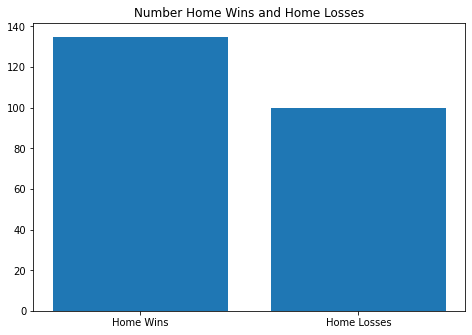

In [95]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
win_loss = ['Home Wins', 'Home Losses']
win_loss_number = ([df_prognose_bundesliga["home_win"].sum(),df_prognose_bundesliga["home_loss"].sum()])
ax.bar(win_loss,win_loss_number)
plt.title('Number Home Wins and Home Losses')
plt.show()

Text(0.5, 1.0, 'Goal Difference')

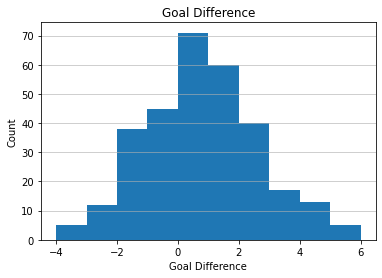

In [74]:
import matplotlib.pyplot as plt
plt.hist(x=df_prognose_bundesliga["goal_difference"])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Goal Difference')
plt.ylabel('Count')
plt.title('Goal Difference')

In [46]:
df_visitor = pd.get_dummies(df_prognose_bundesliga["away_team_api_id"], dtype=np.int64)
df_home = pd.get_dummies(df_prognose_bundesliga["home_team_api_id"], dtype=np.int64)
df_home

,1. FC Köln,1. FSV Mainz 05,Bayer 04 Leverkusen,Borussia Dortmund,Borussia Mönchengladbach,Eintracht Frankfurt,FC Augsburg,FC Bayern Munich,FC Ingolstadt 04,FC Schalke 04,Hamburger SV,Hannover 96,Hertha BSC Berlin,SV Darmstadt 98,SV Werder Bremen,TSG 1899 Hoffenheim,VfB Stuttgart,VfL Wolfsburg
9950,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9951,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9952,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9954,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10251,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
10252,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10253,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10254,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
# subtract home from visitor
df_model = df_home.sub(df_visitor) 
df_model['goal_difference'] = df_prognose['goal_difference']
df_model

,1. FC Köln,1. FSV Mainz 05,Bayer 04 Leverkusen,Borussia Dortmund,Borussia Mönchengladbach,Eintracht Frankfurt,FC Augsburg,FC Bayern Munich,FC Ingolstadt 04,FC Schalke 04,Hamburger SV,Hannover 96,Hertha BSC Berlin,SV Darmstadt 98,SV Werder Bremen,TSG 1899 Hoffenheim,VfB Stuttgart,VfL Wolfsburg,goal_difference
9950,0,0,0,0,0,0,0,1,0,0,-1,0,0,0,0,0,0,0,5
9951,0,0,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,4
9952,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,1
9953,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,1,1
9954,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10251,0,0,0,0,0,0,1,0,0,0,0,0,0,-1,0,0,0,0,-2
10252,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,1,0,0,0,-1
10253,0,0,0,0,-1,1,0,0,0,0,0,0,0,0,0,0,0,0,-4
10254,1,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,-1


In [103]:

df_train = df_model # not required but I like to rename my dataframe with the name train.

lr = Ridge(alpha=0.001) 
X = df_train.drop(['goal_difference'], axis=1)
y = df_train['goal_difference']

lr.fit(X, y)

df_ratings = pd.DataFrame(data={'Team': X.columns, 'Rating': lr.coef_})
df_ratings.astype(object)

,Team,Rating
0,1. FC Köln,-0.111108
1,1. FSV Mainz 05,0.111108
2,Bayer 04 Leverkusen,0.444432
3,Borussia Dortmund,1.3333
4,Borussia Mönchengladbach,0.472209
5,Eintracht Frankfurt,-0.499986
6,FC Augsburg,-0.27777
7,FC Bayern Munich,1.74995
8,FC Ingolstadt 04,-0.249993
9,FC Schalke 04,0.055554
